<a href="https://colab.research.google.com/github/alvaro-salgado/PCD_MCD/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 4

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargar la imagen
image = cv2.imread("/content/GR.jpg", cv2.IMREAD_UNCHANGED)
original = image.copy()


In [5]:
# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Suavizar la imagen para reducir el ruido
blurred = cv2.medianBlur(gray, 5)

# Aplicar un umbral adaptativo
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

In [10]:
# Convertir la imagen binaria a color para superponerla
thresh_color = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
colored_thresh = np.zeros_like(thresh_color)
colored_thresh[thresh == 255] = (0,255,0)
# Crear una imagen combinada con transparencia
alpha = 0.5  # Transparencia (0 = solo fondo, 1 = solo umbral)
combined = cv2.addWeighted(original, 1 - alpha, colored_thresh, alpha, 0)

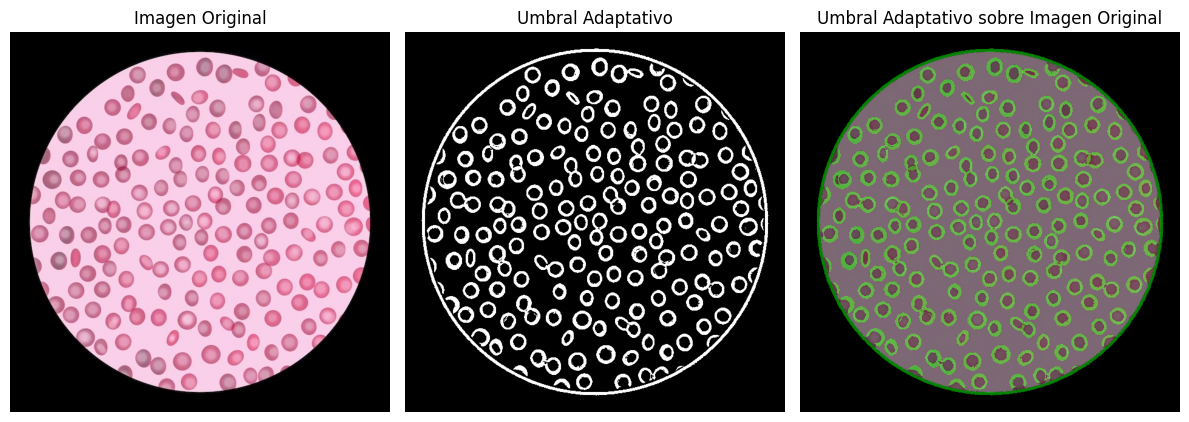

In [11]:
# Mostrar resultados
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Umbral Adaptativo")
plt.imshow(thresh, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Umbral Adaptativo sobre Imagen Original")
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()